# 21_HES-SO-ARC_646-2.3 SCIENCE DES DONNÉES 
## House Prices: Advanced Regression Techniques
##### Adrien Sigrist, Vincent Zurbrugg, Loic Mary, Antoine Frey

## Phases:
#### 1. Compréhension métier

    1.1 Les objectifs métiers
    1.2 Évaluer la situation actuelle
        1.2.1 Inventaire des ressources
        1.2.2 Risques et éventualités
    1.3 Resultats attendus
        1.3.1 Critères de succès
        1.3.2 Critères de succès du minage de donnéés
        1.3.3 Produire un plan de projet
    1.4 Quelles sont les questions auxquelles nous essayons de répondre?
#### 2. Compréhension des données
    2.1 Description des données
        2.1.1 Validation_raw
        2.1.2 Train_raw
    2.2 Vérifier la qualité des données
        2.2.1 La variable dépendante
        2.2.2 Variables indépendantes
    2.3 Traitement des données manquantes
        2.3.1 Variables quantitatives
        2.3.2 Variables qualitatives
        2.3.3 Variables temporelles
    2.4 Preprocessing
    2.5 Exploration initiale des données
        2.5.1 Corrélations
    2.6 Modèle baseline
        2.6.1 Regression linéaire: Version 1
        2.6.2 Outliers et valeurs extrêmes
        2.6.3 Régression linéaire corrigée
    2.7 Modèle features
        2.7.1 Régression linéaire: Version 2
#### 3. Préparation des données
	3.1 Création des holdouts
#### 4. Modelling
	4.1 Nos modèles de prédictions
		4.1.1 Régression linéaire
		4.1.2 K_Nearest Neighbors (KNN)
		4.1.3 Arbre décisionnel
		4.1.4 Random Forest
		4.1.5 Gradient Boosting
		4.1.6 Sommaire des performances initiales
	4.2 Cross Validation et Grid Search
		4.2.1 Sommaire des Cross-validation
	4.3 Amélioration après cross validation
	4.4 Amélioration avec toutes les variables
		4.4.1 Sommaire des cross-validation de nos modèles avec toutes les variables.
#### 5. Evaluation
	5.1 Les bons modèles et les moins bons
	5.2 Perspectives d'améliorations
	5.3 Limites
    5.4 Remarques
#### 6. Déploiement
	6.1 Génération du modèle avec gradientboosting
	6.2 Impact
	6.3 Ethique
    6.4 Conclusion

# 1. Compréhension métier  <a class="anchor" id="Businessunderstanding"></a>

## 1.1 Les objectifs métiers <a class="anchor" id="BusinessObjectives"></a> 

Prédire le prix de maisons du dataset que seul Kaggle dispose et cela avec la meilleure précision possible. 
Pour cela nous disposons d'un dataset "train" pour nous permettre d'entrainer notre algorithme et un dataset "test" pour le tester a la fin. 

La mesure du succès ne se fait pas sur les erreurs absolues mais les erreurs relatives. C'est un élement important car cela veut dire que la mesure de l'erreur entre le prix estimé et le prix réel se fait relativement au prix de la maison. En d'autre termes, les maisons cheres et les maisons bon marché affecteront le résultat de la meme maniere. 

(Exemple: 2 maisons: la premieres a 100'000 dollars et l'autre a 1'000 000 dollars, mesurer l'erreur en valeur absolue voudrait dire qu'une difference de 10'000 dollars pour les deux maisons affecterait le resultat de facon equivalente, cependant ce n'est pas le cas, la difference est mesurée en fonction du prix de la maison. La maison la plus chere affectera beaucoup moins le resultat car 10'000 dollars représente une plus petite partie de son prix. 

En sachant cela, nous utiliseront le log du prix pour normaliser le prix et permettre de mesurer le "succès" en erreur relative. 


## 1.2 Évaluer la situation actuelle<a class="anchor" id="Assessthecurrentsituation"></a>

Nous avons 79 variables décrivant (presque) tous les aspects des maisons résidentielles de Ames, dans l'Iowa.
C'est un état américain qui est réputé pour subir le passages de nombreuses tornades. 
En effet  c'est un état qui fait partie de "l'allée aux tornades" qui traverse le centre des Etats-Unis. 
Ce que l'on peut dire avant d'étudier le dataset:
Les quartiers dans lesquels se trouvent les maisons des datasets (train, test et celui pour l'evaluation de Kaggle) sont typiques, avec la plupart du temps: une maison reliée à des rues parallèles les unes aux autres, une petite parcelle de jardin devant la maison, les maisons ne sont souvent pas très solides (fait en bois pour une majorité d'entre elles).

### 1.2.1 Inventaire des ressources <a class="anchor" id="Inventory"></a>

- Personnel: 4 personnes: Adrien Sigrist, Vincent Zurbrugg, Loic Mary, Antoine Frey
- Données: 3 jeux de données et une description texte
- Computing resources: Nos PC
- Software: Jupyter

### 1.2.2 Risques et éventualités <a class="anchor" id="Risks"></a>
- Ne pas finir le projet à temps
- Avoir des données inutilisables


 ## 1.3 Resultats attendus <a class="anchor" id="Desiredoutputs"></a>

### 1.3.1 Critère de succès
- Avoir la marge d'erreur la plus petite possible

### 1.3.2 Critère de succès du minage de données
- Avoir une prédiction du prix qui se rapproche le plus possible de la réalité

### 1.3.3 Produire un plan de projet
- On va utiliser la méthodologie CRISP DM, pour analyser le jeu de données et produire un modèle statistique de prédiction.

<img src="image/gantt.jpg"
     alt="Gantt"
     style="height: 180px;" />



 ## 1.4 Quelles sont les questions auxquelles nous essayons de répondre ? <a class="anchor" id="QA"></a>

- Quel est le prix de chaque maison? 
- Quel est le modèle le plus adapter pour cette prédiction/ ceux qui ne le sont pas?

# 2. Compréhension des données <a class="anchor" id="Dataunderstanding"></a>

Dans cette phase, nous allons comprendre les données que nous avons dans notre dataset. Pour relever celles qui pourront être utiles et celles qui ne le seront pas. Cette phase est importante car une bonne compréhension des datas permet une analyse plus précise et correcte. Dans ce processus on relève le taux de valeurs manquantes dans chaque attribut, mais également son type (quantitative, qualitative.. ).

In [1]:
# Import Libraries Required
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import statsmodels.api as sm
import graphviz
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import KFold
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from IPython.display import HTML, display

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

In [2]:
# Data source: 
# ss =  pd.read_csv('data/sample_submission.csv', sep=',') 
train_raw = pd.read_csv('data/train.csv', index_col = 'Id')
validation_raw = pd.read_csv('data/test.csv', index_col = 'Id')

## 2.1 Description des données <a class="anchor" id="Describedata"></a>


### 2.1.1 Validation_raw
Description du dataset validation_raw (ancien "test") qui va permettre de valider notre modèle réalisé avec le dataset train_raw (ancien "train").

#### Les colonnes

In [3]:
validation_raw.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

#### Shape (dimensions du dataframe)

In [4]:
validation_raw.shape

(1459, 79)

Il y a 1459 tuples et 79 variables. 

#### Les types de variables

In [5]:
validation_raw.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object
HeatingQC         object


#### Description des variables

In [6]:
validation_raw.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [7]:
validation_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [8]:
validation_raw.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Apercu des données de validation_raw.

### 2.1.2 Train_raw
Description du data set train_raw (ancien "train"), qui va permettre d'entrainer notre modèle.

#### Les colonnes

In [9]:
train_raw.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

#### Shape

In [10]:
train_raw.shape

(1460, 80)

Il y a 1460 tuples et 80 variables. 

#### Les types de variables

In [11]:
train_raw.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


#### Les colonnes

In [12]:
train_raw.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [14]:
train_raw.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2.2 Verifier la qualité des données <a class="anchor" id="Verifydataquality"></a>

Examiner la qualité des données en répondant à des questions telles que:

- Les données sont-elles complètes (couvrent-elles tous les cas requis)?
- Est-ce correct ou contient-il des erreurs et, s'il y a des erreurs, quelle est leur fréquence?
- Y a-t-il des valeurs manquantes dans les données? Si tel est le cas, comment sont-elles représentées, où se produisent-elles et quelle est leur fréquence?

### 2.2.1 La variable dépendante

Cette variable doit être analysée en tout premier lieu. En effet, c'est notre raison d'être dans la compétition. On s'interesse donc à SalePrice.

In [15]:
y = train_raw['SalePrice']
train_raw = train_raw.drop(['SalePrice'], axis = 1)

Nous mettons le 'SalePrice' dans la variable y et nous le supprimons de train_raw.
Comme c'est une variable dépendente nous la séparons pour pouvoir la réutiliser plus facilement. 

Description de la variable y

In [16]:
print(y.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\Users\Adrien\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


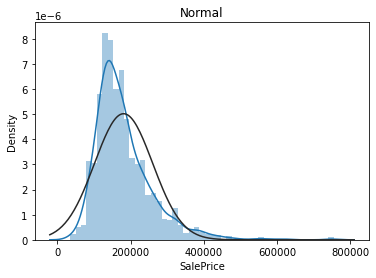

In [17]:
# distribution plot with normal fit
plt.title('Normal')
sns.distplot(y, fit = stats.norm)
plt.show()

La ligne bleue représente la distribution du prix et la ligne noire est la distribution normale. 
Ce qui nous amene a la conclusion que la variable du prix n'est pas normalement distribuée. 
Mais c'est normal! On n'utilise pas encore le log du prix comme expliqué dans le point 1.1.

C:\Users\Adrien\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


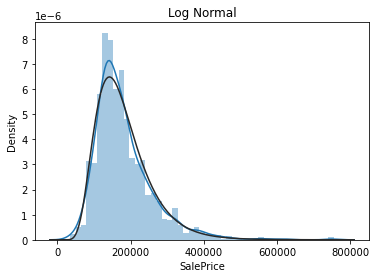

In [18]:
# distribution plot with log normal fit
plt.title('Log Normal')
sns.distplot(y, fit=stats.lognorm)
plt.show()

En utilisant le log normal, la distribution du prix est cette fois quasi normale.

C:\Users\Adrien\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


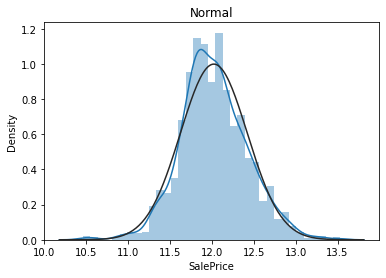

In [19]:
# distribution plot with normal fit
y = np.log1p(y)
plt.title('Normal')
sns.distplot(y, fit = stats.norm)
plt.show()

La même chôse peut être dites en utilisant log1p, qui est la version du log qui selon la documentation est à utiliser. 
https://numpy.org/doc/stable/reference/generated/numpy.log1p.html

### 2.2.2 Variables indépendantes

On traite maintenant les variables indépendantes du dataset. Ci-dessous, on regroupe les variables par type de variables. On note que certaines variables peuvent avoir plusieurs interprétations. Par exemple, la variable _OverallQual_ est une variable à priori qualitative ordinale (de bad à excellent). Cependant, puisqu'elle possède plus que 5 niveaux, on peut la traiter comme une variable quantitative. D'autres choix sont possibles.

In [20]:
qualitative = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
              'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
              'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
              'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
              'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
              'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
              'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 
              'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
              'SaleType', 'SaleCondition']

quantitative = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',  
               'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
               'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
               'PoolArea', 'MiscVal']

time = ['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold', 'GarageYrBlt']

On concatène les deux dataset afin d'executer le traitement sur les données d'une traite

In [21]:
data_raw = pd.concat([train_raw, validation_raw])

## 2.3 Traitement des données manquantes <a class="anchor" id="MissingData"></a>

In [22]:
def plot_missing(data):

    missing = data.isnull().sum()
    missing = missing[missing > 0]
    
    if missing.empty:
        print('Aucune donnée manquante')
    else :
        missing.sort_values(inplace=True)
        missing.plot.bar()
    
        plt.show()

### 2.3.1 Variables quantitatives

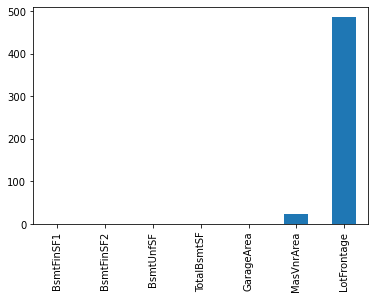

In [23]:
plot_missing(data_raw[quantitative])

En lisant la documentation, on peut voir que les données manquantes ne sont pas des données manquantes mais des "NA". Par exemple les données manquantes dans LotFrontage veulent juste dire qu'il n y a pas de LotFrontage.
Nous allons compléter ces valeurs avec des 0.

In [24]:
def fill_missing_with_zero(data, columns):
    
    data_clean = data.copy()
    
    for c in columns :
        
        if data_clean[c].isnull().any():
            data_clean[c] = data_clean[c].fillna(0)
    
    return data_clean

Cette fonction nous permet de remplacer les variables quantitatives "manquantes" par des 0.

### 2.3.2 Variables qualitatives

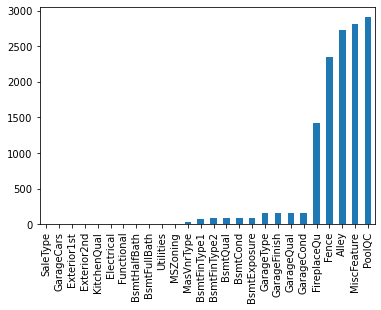

In [25]:
plot_missing(data_raw[qualitative])

Les valeurs NA ont une valeur métier: 
Par exemple avoir un null (NA) dans PoolQC (la qualité de la piscine) signifie simplement que la maison n'a pas de piscine.

On peut dire la même chose pour les autres variables, NA signifie juste que c'est non existant mais que c'est intentionnel de rien mettre ce n'est pas un oubli. 

In [26]:
def get_dummies(data, columns):
    return pd.get_dummies(data, columns = columns)

Pour traiter ces données "manquantes" nous utilisons une fonction get_dummies qui donne des 0 et des 1 pour chacune des variables qualitatives. 

### 2.3.3 Variables temporelles

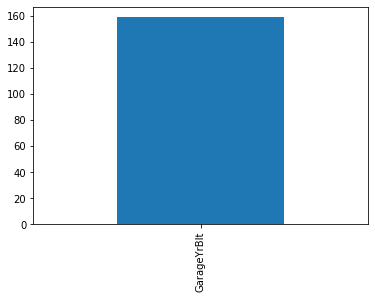

In [27]:
plot_missing(data_raw[time])

Afin d'être correct statistiquement parlant, on va substituer les null dans GarageYrBlt avec la date de construction de la maison. Ces dates concordent très souvent, il suffit de regarder le dataset. Ceci fait aussi sens d'un point de vue métier: le garage est rarement construit à postériori. Il est fait en même temps que la maison.

In [28]:
def fill_missing_with_column(data, missing, column) :
    
    data_clean = data.copy()
    
    data_clean[missing] = np.where(data_clean[missing].isnull(), data_clean[column], data_clean[missing])
    
    return data_clean

De plus, on va traiter les variables temporelles en calculant l'age relatif à l'année de vente. D'un point de vu métier, c'est probablement plus pertinent, car les années de ventes se situe entre 2006 et 2010.

In [29]:
def compute_differences_to_year_sold(data) :
    
    data_clean = data.copy()
    
    data_clean['YearBuilt'] = data_clean['YrSold'] - data_clean['YearBuilt']
    data_clean['YearRemodAdd'] = data_clean['YrSold'] - data_clean['YearRemodAdd']
    data_clean['GarageYrBlt'] = data_clean['YrSold'] - data_clean['GarageYrBlt']
    
    return data_clean

## 2.4 Preprocessing 

#### Normalisation des données 

Afin d'utiliser des algorithmes nécéssitant une comparaison des colonnes les unes aux autres, on va normaliser les données.
Cette normalisation nous permet de tout avoir à la même échelle, en centrant les données autour de zéro avec une moyenne de 1.


In [30]:
from sklearn.preprocessing import StandardScaler

def normalize_all_columns(data) :
    
    data_clean = data.to_numpy(copy = True)
    
    data_clean = StandardScaler().fit_transform(data_clean)
    data_clean = pd.DataFrame(data_clean, index = data.index, columns = data.columns)
    
    return data_clean

On execute ces fonctions et met le dataset nettoyé dans data_clean: 
- normalize_all_columns (normalisation)
- compute_differences_to_year_sold (s'occupe des variables temporelles)
- getDummies
- fill_missing_with_zero
- fill_missing_with_column

In [31]:
def preprocess(data, qualitative, quantitative):
    
    data_clean = data.copy()
    
    
    data_clean = get_dummies(data_clean, qualitative)
    data_clean = fill_missing_with_zero(data_clean, quantitative)
    data_clean = fill_missing_with_column(data_clean, missing = ['GarageYrBlt'], column = ['YearBuilt'])
    
    data_clean = compute_differences_to_year_sold(data_clean)
    
    data_clean = normalize_all_columns(data_clean)
    
    return data_clean

In [32]:
data_clean = preprocess(data_raw, qualitative, quantitative)

data_clean.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0.216075,-0.217879,0.646183,-0.507284,-1.037881,-0.887009,0.529034,0.581145,-0.293025,-0.934165,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.664158,-0.072044,-0.063185,2.188279,-0.180672,0.357696,-0.567016,1.178255,-0.293025,-0.629284,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,0.305692,0.137197,0.646183,-0.507284,-0.971942,-0.839135,0.338903,0.098189,-0.293025,-0.287999,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
4,0.066714,-0.078385,0.646183,-0.507284,1.797503,0.597063,-0.567016,-0.494529,-0.293025,-0.046824,...,-0.052423,-0.298629,-0.049029,0.395018,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
5,0.783647,0.518903,1.355551,-0.507284,-0.938972,-0.743389,1.390216,0.469187,-0.293025,-0.160586,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


## 2.5 Exploration initiale des données  <a class="anchor" id="Exploredata"></a>

###  2.5.1 Corrélations

On va analyser le liens entre chacune des variables avec _SalePrice_. Pour ce faire, on a besoin de reséparer le dataset qui a été nettoyé en $X$ et $X_{val}$. La corrélation ne peut être calculée qu'entre $y$ et $X_{val}$.

In [33]:
X = data_clean[data_clean.index.isin(train_raw.index)]
X_val = data_clean[data_clean.index.isin(validation_raw.index)]

On va calculer les corrélations entre chacune des variables dépendantes avec la variable indépendante. Dans le cas des variables quantititatives, ceci suggère l'existence d'un lien linéaire. Dans le cas des variables dichotomiques la corrélation se fait interpréter comme une _corrélation bisérial de point_ (https://en.wikipedia.org/wiki/Point-biserial_correlation_coefficient). 

En bref, cette corrélation effectue un t-test à deux échantillons. La corrélation traduit la taille d'effet du t-test, qui correspond aussi à la part de variance expliquée par la variable dichotomique.

In [34]:
def correlation(y, X, method = 'pearson'):
    
    cor = pd.DataFrame()
    features = X.columns.tolist()
   
    cor['feature'] = X.columns.tolist()
    cor['correlation_coef'] = [X[f].corr(y, method = 'pearson') for f in features]
    cor['correlation_coef'] = cor['correlation_coef'].fillna(0)
    
    cor = cor.sort_values('correlation_coef', ascending = False)

    plt.figure(figsize=(10, 0.25*len(features)))
    sns.barplot(data = cor, y = 'feature', x = 'correlation_coef', orient = 'h')
    
    return cor

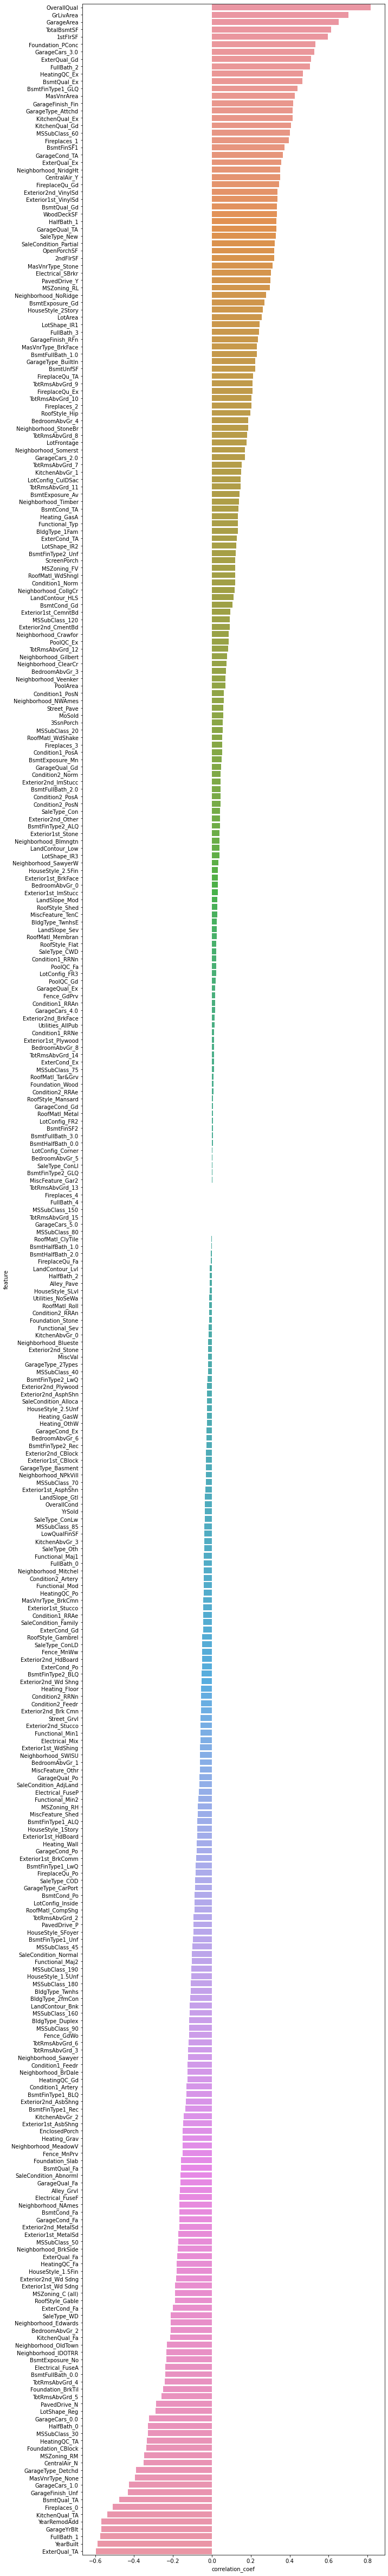

In [35]:
cor = correlation(y, X)

Les variables qui ont la plus forte corrélation positive avec le prix sont dans l'ordre: 
OverallQual qui determine la qualité globale de la maison.
GrLivArea qui est la surface habitable.
GarageArea qui est la surface du garage.
TotalBsmtSF qui est la surface du sous sol, cela montre son role qui peut s'expliquer par le fait que c'est une région à tornades et que l'interet d'avoir un abris est grand.
1stFlrSF: surface du rez de chaussée 
Foundation_PConc: fondation coulée en ciment qui peut peut etre aussi s'expliquer par le fait que c'est une région à tornade, d'ou le fort interet d'avoir une maison qui est solide et bien attachée au sol. 
GarageCars_3.0: capacité du garage de 3 voitures qui est synonyme d'un garage particulierement grand, détenu de manière générale par de grandes et chere maisons. 
ExterQual_Gd: bonne qualité des materiaux exterieur. 
etc..

Celles qui ont la plus forte corrélation négatives sont:
ExterQual_TA qui montre que la qualité exterieur est moyenne. 
YearBuilt, donc plus une maison est ancienne plus le prix baisse. 
FullBath_1 il n'y a qu'une seule salle de bain. 
GarageYrBlt qui est: il y a combien de d'année le garage a t-il été construit. 
YearRemodAdd: age des renovations. 

On remarque que les variables avec une forte corrélation sont globalement logique, il n'y a pas de grande surprise. Certaines variables comme TotalBsmtSF, Foundation_PCconc, BsmtQual_Ex ont une corrélation qui est certainement boosté dut au fait que c'est une région à tornades et qu'elles assurent une certaine sécurité, ce qui peut expliquer leur forte corrélation avec le prix. 
On remarque aussi que les variables liées à l"age" de la maison (YearBuilt, GarageYrBuilt, YearRemodAdd, etc.) ont un fort impact sur le prix. Plus la maison est ancienne plus son prix corrèle de facon négative. 

### Scatter plots

Nous allons analyser les variables les plus importantes pour voir si il y a rien d'anormal, en utilisant des scatter plots.

In [36]:
features = cor['feature'][abs(cor['correlation_coef']) > 0.5]

In [37]:
def scatter_plots(y, X, columns) :
    
    for f in columns :
        x = X[f]
        
        plt.title('Correlation ' + y.name + ' & ' + x.name)
        sns.regplot(x = x.name, y = y.name, data = pd.concat([x, y], axis = 1), x_jitter = .05)
        
        plt.show()

Ci dessous les scatter plots des variables que nous allons étudiées.
Certains d'entres eux ne sont pas interpretables car les valeurs possibles sont binaires (exemple: FoundationPConc, Garage_Cars3.0, etc.)
On peut clairement voir une corrélation avec Saleprice pour les variables:OverallQual, GrvLivArea, GarageArea, etc.
Elles suivent une corrélation linéaire que l'on peut visualiser par la ligne bleue. 
On constate aussi qu'il y a pas mal d'outliers, nous les enleverons dans le point suivant. 

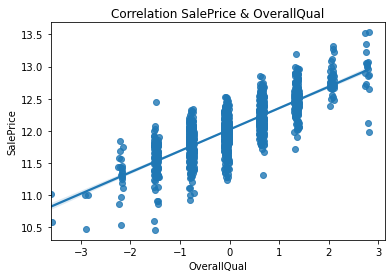

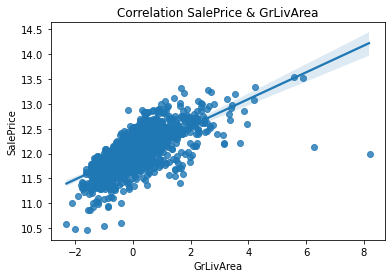

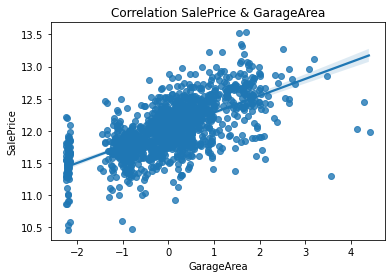

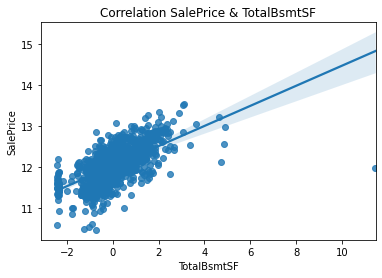

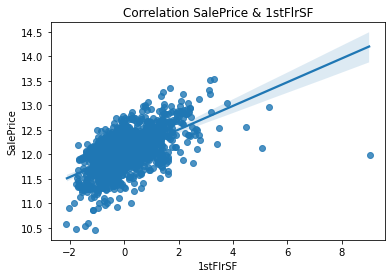

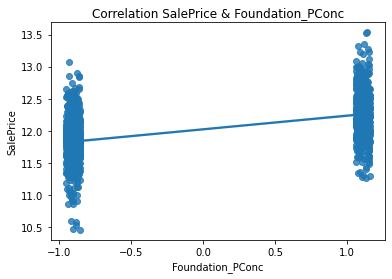

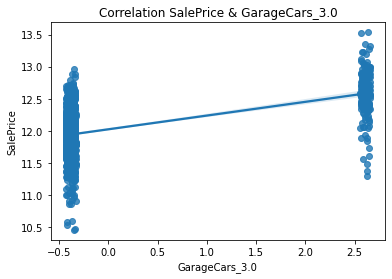

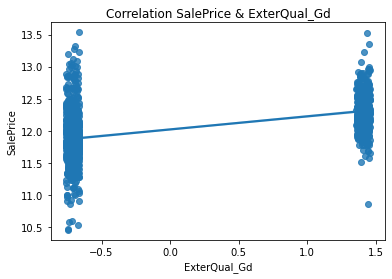

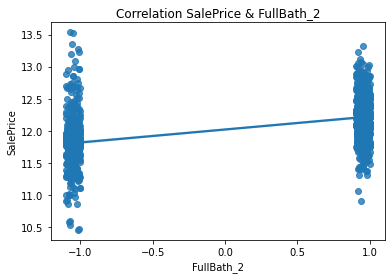

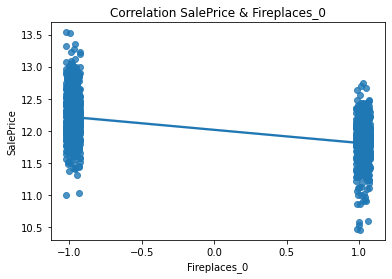

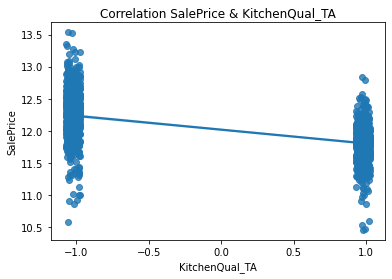

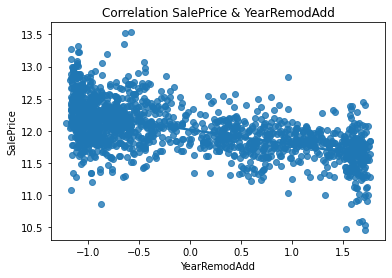

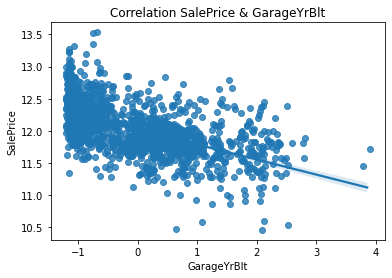

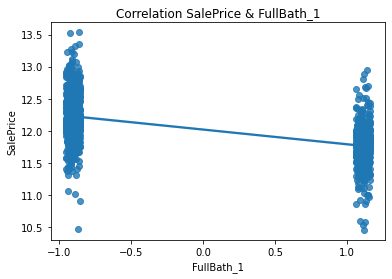

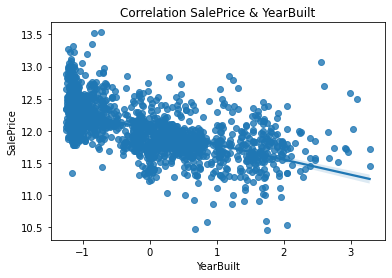

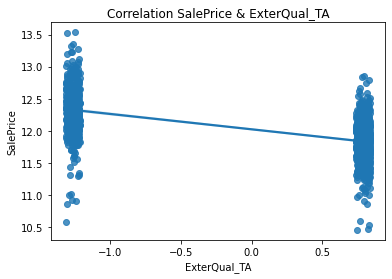

In [38]:
scatter_plots(y, X, features)

## 2.6 Modèle baseline

Le modèle baseline est le modèle le plus simple possible que nous avons réeussi à faire et notre but sera de 
l''améliorer et de trouver d''autres modèles qui sont peu-être plus performants. 


In [39]:
base = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt']

Nous prenons ces variables car ce sont celles qui sont les plus logiques quand nous choisissons un bien.
En effet, même en Suisse quand on éstime le prix d'un bien nous regardons la qualité global(OverallQual), les metres carrées total et des différentes pieces (GrLivArea,TotalBsmtSF,1stFlrSF) et l'année de construction (YearBuilt). De plus comme nous venons de voir leur corrélation avec SalePrice est forte. 

### 2.6.1 Regression linéaire: Version 1

In [40]:
model = sm.OLS(y, sm.add_constant(X[base]))
res = model.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     1157.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:03:37   Log-Likelihood:                 440.31
No. Observations:                1460   AIC:                            -868.6
Df Residuals:                    1454   BIC:                            -836.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.0187      0.005   2559.002      

On peut voir qu'on a que des p-valeur qui sont très significatives et le modèle explique 80% de la variance. 

### Assomptions

Afin de valider que la regression linéaire est ajustée correctement, il est nécessaire de vérifier les assomptions, i.e. normalité de la variable dépendante, homoscédasticité, absence de structure dans les résidus.

In [41]:
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')


def diagnostic_plots(X, y, model_fit=None):
  """
  Function to reproduce the 4 base plots of an OLS model in R.

  ---
  Inputs:

  X: A numpy array or pandas dataframe of the features to use in building the linear regression model

  y: A numpy array or pandas series/dataframe of the target variable of the linear regression model

  model_fit [optional]: a statsmodel.api.OLS model after regressing y on X. If not provided, will be
                        generated from X, y
  """

  if not model_fit:
      model_fit = sm.OLS(y, sm.add_constant(X)).fit()

  # create dataframe from X, y for easier plot handling
  dataframe = pd.concat([X, y], axis=1)

  # model values
  model_fitted_y = model_fit.fittedvalues
  # model residuals
  model_residuals = model_fit.resid
  # normalized residuals
  model_norm_residuals = model_fit.get_influence().resid_studentized_internal
  # absolute squared normalized residuals
  model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
  # absolute residuals
  model_abs_resid = np.abs(model_residuals)
  # leverage, from statsmodels internals
  model_leverage = model_fit.get_influence().hat_matrix_diag
  # cook's distance, from statsmodels internals
  model_cooks = model_fit.get_influence().cooks_distance[0]

  plot_lm_1 = plt.figure()
  plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                            lowess=True,
                            scatter_kws={'alpha': 0.5},
                            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

  plot_lm_1.axes[0].set_title('Residuals vs Fitted')
  plot_lm_1.axes[0].set_xlabel('Fitted values')
  plot_lm_1.axes[0].set_ylabel('Residuals');

  # annotations
  abs_resid = model_abs_resid.sort_values(ascending=False)
  abs_resid_top_3 = abs_resid[:3]
  for i in abs_resid_top_3.index:
      plot_lm_1.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_residuals[i]));

  QQ = ProbPlot(model_norm_residuals)
  plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
  plot_lm_2.axes[0].set_title('Normal Q-Q')
  plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
  plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
  # annotations
  abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
  abs_norm_resid_top_3 = abs_norm_resid[:3]
  for r, i in enumerate(abs_norm_resid_top_3):
      plot_lm_2.axes[0].annotate(i,
                                 xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                     model_norm_residuals[i]));

  plot_lm_3 = plt.figure()
  plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
  sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
  plot_lm_3.axes[0].set_title('Scale-Location')
  plot_lm_3.axes[0].set_xlabel('Fitted values')
  plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

  # annotations
  abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
  abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
  for i in abs_norm_resid_top_3:
      plot_lm_3.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_norm_residuals_abs_sqrt[i]));


  plot_lm_4 = plt.figure();
  plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
  sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
  plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
  plot_lm_4.axes[0].set_ylim(-3, 5)
  plot_lm_4.axes[0].set_title('Residuals vs Leverage')
  plot_lm_4.axes[0].set_xlabel('Leverage')
  plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

  # annotations
  leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
  for i in leverage_top_3:
      plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));

  p = len(model_fit.params) # number of model parameters
  graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50),
        'Cook\'s distance') # 0.5 line
  graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50)) # 1 line
  plot_lm_4.legend(loc='upper right');

C:\Users\Adrien\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Adrien\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Adrien\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


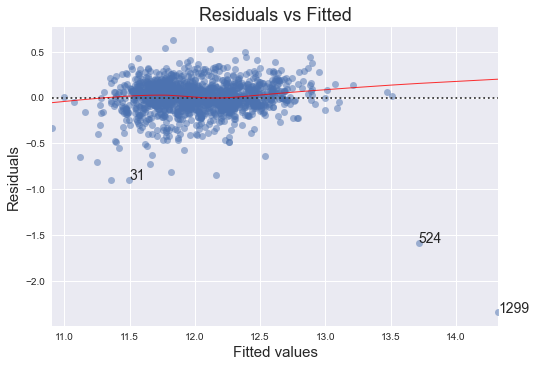

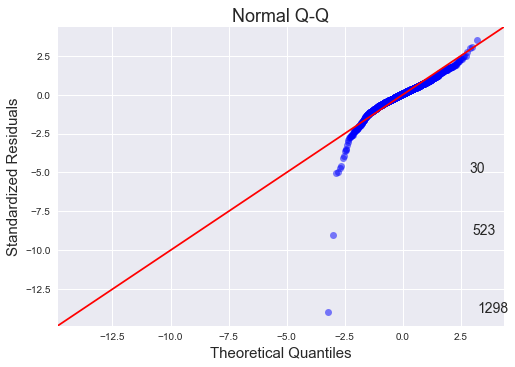

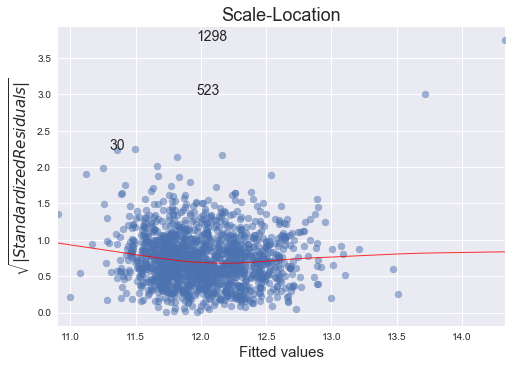

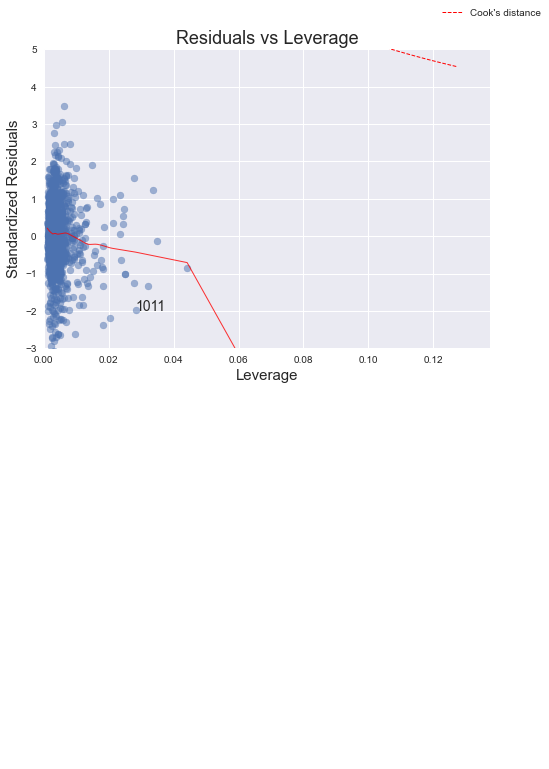

In [42]:
diagnostic_plots(X[base], y)

### 2.6.2 Outliers et valeurs extrêmes

On peut voir dans les diagnostics plots qu'il y a des valeurs trop extremes (1298 et 523) qui biaisent les résultats.

In [43]:
print(X[base].iloc[[523, 1298]])

      OverallQual  GrLivArea  TotalBsmtSF  1stFlrSF  YearBuilt
Id                                                            
524      2.774287   6.275620     4.730998  5.043192  -1.202729
1299     2.774287   8.184846    11.469541  9.004498  -1.202729


Nous pouvons voir que pour l'Id 524, la superficie à 6 déviation standards en plus que la moyenne, la maison est donc très très grande. L'ID 1299 est à 8 déviation standards en plus que la moyenne !

In [44]:
def drop_outliers(data, y, features) :
    
    data_clean = data.copy()
    data_clean[y.name] = y
    
    for f in features :
        condition = (data_clean[f] < -3) | (data_clean[f] > 3)
        ix = data_clean[condition].index
        data_clean = data_clean.drop(index = ix)
    
    return data_clean[data.columns], data_clean[y.name]

Nous allons supprimer toutes la lignes qui ont plus ou moins 3 deviation standards. Nous utilisons 3 deviation standard car c'est comme ça qu'on qualifie une valeur extreme en terme de z-score.

In [45]:
X, y = drop_outliers(X, y, features = base)

X[base].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429 entries, 1 to 1460
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OverallQual  1429 non-null   float64
 1   GrLivArea    1429 non-null   float64
 2   TotalBsmtSF  1429 non-null   float64
 3   1stFlrSF     1429 non-null   float64
 4   YearBuilt    1429 non-null   float64
dtypes: float64(5)
memory usage: 67.0 KB


### 2.6.3 Régression linéaire: version 1 corrigée 

Nous refaisons la régression linéaire cette fois sans les outliers.

In [46]:
model = sm.OLS(y, sm.add_constant(X[base]))
res = model.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     1370.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:03:40   Log-Likelihood:                 602.76
No. Observations:                1429   AIC:                            -1194.
Df Residuals:                    1423   BIC:                            -1162.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.0226      0.004   2853.931      

On peut voir qu'on est passé de 80% à 83% de variance expliquée.

C:\Users\Adrien\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Adrien\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Adrien\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


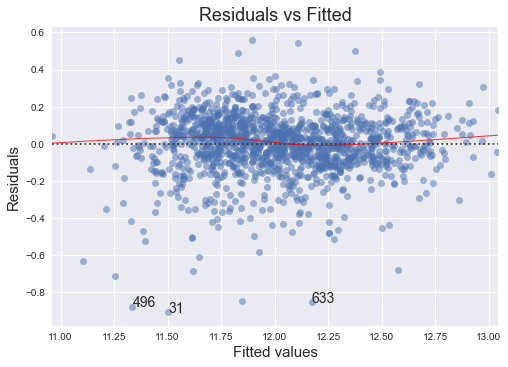

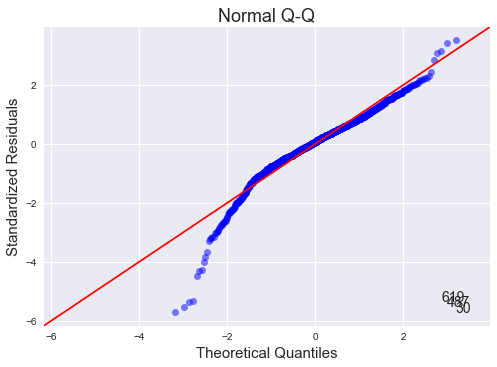

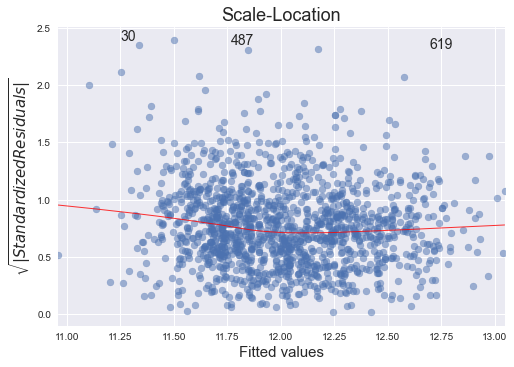

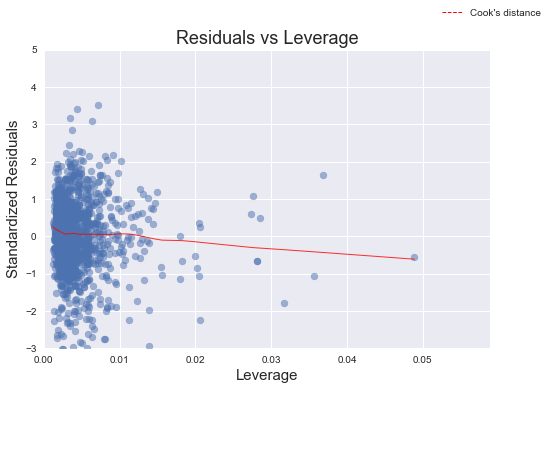

In [47]:
diagnostic_plots(sm.add_constant(X[base]), y)

Nous pouvons voir que les diagnostics plots sont bien meilleurs après la suppresion des outliers, bien que le Normal Q-Q ne soit pas parfait. En effet, celui-ci nous indique des erreurs assez importantes lorsque le prix est bas. Les assomptions sont donc vérifiées. 


## 2.7 Modèle features

Nous allons refaire une régression linéaire, mais avec des paramètres différents.En effet nous allons prendre toutes les variables qui ont plus de 0.5 de correlation positives ou négatives.

Dans cette version on se débarasse déjà des outliers. 

In [48]:
X, y = drop_outliers(X, y, features = features)

X[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423 entries, 1 to 1460
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OverallQual       1423 non-null   float64
 1   GrLivArea         1423 non-null   float64
 2   GarageArea        1423 non-null   float64
 3   TotalBsmtSF       1423 non-null   float64
 4   1stFlrSF          1423 non-null   float64
 5   Foundation_PConc  1423 non-null   float64
 6   GarageCars_3.0    1423 non-null   float64
 7   ExterQual_Gd      1423 non-null   float64
 8   FullBath_2        1423 non-null   float64
 9   Fireplaces_0      1423 non-null   float64
 10  KitchenQual_TA    1423 non-null   float64
 11  YearRemodAdd      1423 non-null   float64
 12  GarageYrBlt       1423 non-null   float64
 13  FullBath_1        1423 non-null   float64
 14  YearBuilt         1423 non-null   float64
 15  ExterQual_TA      1423 non-null   float64
dtypes: float64(16)
memory usage: 221.3 KB


### 2.7.1 Régression linéaire: Version 2

In [49]:

model = sm.OLS(y, sm.add_constant(X[features]))
res = model.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     515.1
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:03:42   Log-Likelihood:                 727.22
No. Observations:                1423   AIC:                            -1420.
Df Residuals:                    1406   BIC:                            -1331.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.0212      0.004  

On peut voir que le R-squared s'est amélioré par rapport au modèle basline, on est maintenant passé de 85% de variance expliquée. Cependant beaucoup de variables ont un p-valeur suppérieur a 0.05 donc nous ne pouvons pas les garder. 

Pour corriger ca nous refaisons une régression linéaire avec "features" qui contient les variables dont la P-valeur est inférieure à 0.05. 

In [50]:
features =['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt','GarageArea','Fireplaces_0','YearRemodAdd','GarageYrBlt']

In [51]:
model = sm.OLS(y, sm.add_constant(X[features]))
res = model.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1012.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:03:42   Log-Likelihood:                 712.87
No. Observations:                1423   AIC:                            -1408.
Df Residuals:                    1414   BIC:                            -1360.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           12.0207      0.004   3073.720   

Le R-squared à légérement baissé mais c'est normal.
Cette fois il n'y a aucune p-valeurs suppérieure à 0.05. 

# 3. Préparation des données <a class="anchor" id="Datapreparation"></a>


## 3.1 Création des holdouts

On créer des holdouts à partir de features. Le découpage est de 80/20 et nous permet de vérifier l'overfitting.

In [52]:
# Hold-out pour x
from sklearn.model_selection import train_test_split

#y=np.expm1(y)

X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.2) 

In [53]:
X_train.shape

(1138, 8)

In [54]:
y_train.shape

(1138,)

In [55]:
X_test.shape

(285, 8)

In [56]:
y_test.shape

(285,)

# 4. Modelling <a class="anchor" id="Modelling"></a>

Dans cette étape, nous allons entrainer nos modèles.  

In [57]:
data_raw_encode = pd.concat([train_raw, validation_raw])

In [58]:
data_raw_encode.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


#### Définition de la fonction pour nos modèles

La fonction ci-dessous permet de génèrer le R-squared et mean-squared-error pour chaque modèle de prédiction.

In [59]:
def Predictive_Model(estimator):
    estimator.fit(X_train, y_train)
    prediction = estimator.predict(X_test)
    print('R_squared:', metrics.r2_score(y_test, prediction))
    print('Square Root of MSE:',np.sqrt(metrics.mean_squared_error(y_test, prediction)))
    plt.figure(figsize=(10,8))
    sns.distplot(y_test, hist=True, kde=False)
    sns.distplot(prediction, hist=True, kde=False)
    plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
    plt.xlim(9,)

### 4.1 Nos modèles de prédictions

In [60]:
# Linear Regressor
lr = LinearRegression()

# K_Neighbor Regressor
knn = KNeighborsRegressor(n_neighbors=5)

# Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=15, random_state=0)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

# Gradient Boost Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.001,
                                max_depth=7,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)

Ci-dessus nous paramètrons nos 5 modèles. En plus de la régression linéaire, nous avons choisi 4 modèles supplémentaires pour tenter d'améliorer la performance de la prédiction. les paramètres en entrées sont ceux généralement utilisé pour ces modèles. Dans une seconde partie nous les modifirons avec les paramètres optimaux. 

### 4.1.1 Régression linéaire

Assomption: les assomptions on déjà été vérifiées dans le chapitre précédent.

R_squared: 0.8309025170193705
Square Root of MSE: 0.14958306178999184


C:\Users\Adrien\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


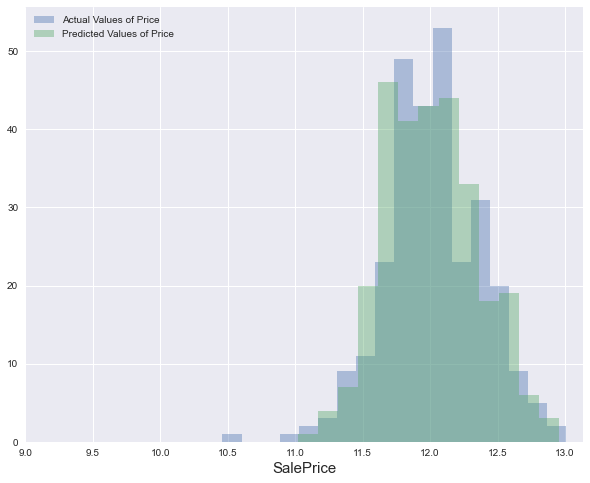

In [61]:
Predictive_Model(lr)

Nous constatons que le modèle(régression linéaire) explique la variance à hauteur de 83% (R-squared) et affiche un taux d'erreur de 15%. Comme nous pouvons le voir sur le graphe, les valeurs s'approchant de la médiane sont mal prédites.

### 4.1.2 K_Nearest Neighbors (KNN)

Assomptions:

1. Standardization: 
    les variables doivent être standardisé et nous l'avons fait avec la fonction "normalize_all_columns"
2. Outliers: 
    il ne faut pas avoir d'outliers. On les supprime avec la fonction "drop_outliers"

Donc les assomptions sont respectées.
    

R_squared: 0.8148632711383937
Square Root of MSE: 0.15651650439546214


C:\Users\Adrien\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


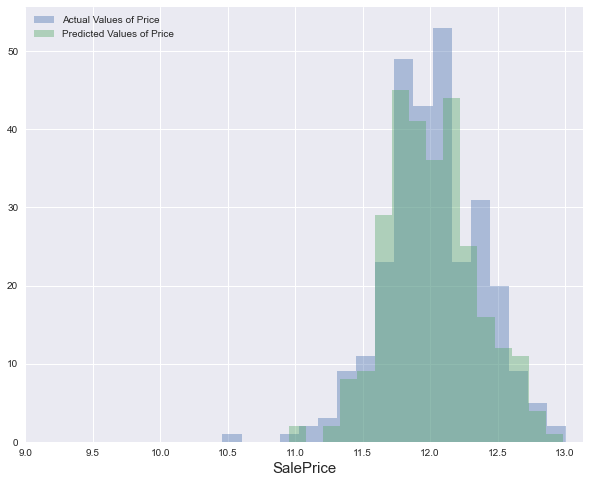

In [62]:
Predictive_Model(knn)

On constate que les erreurs de prédictions sont plus ou moins réparties dans toutes la fourchette de prix. 

### 4.1.3 Arbre décisionnel

Assomptions: il n'y a pas d'assomption pour ce modèle 

C:\Users\Adrien\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


R_squared: 0.6589560727660035
Square Root of MSE: 0.21243154477515683


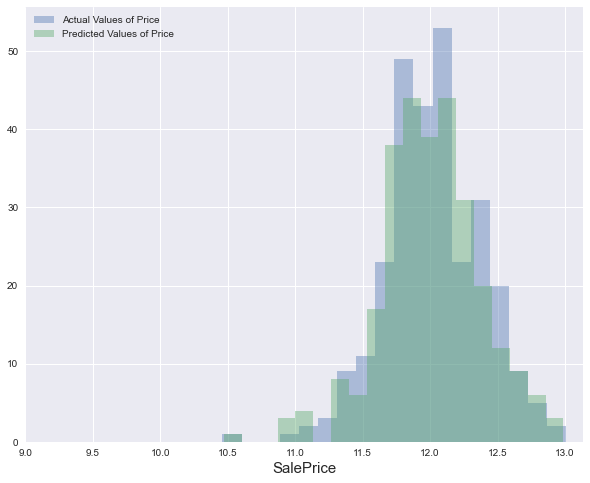

In [63]:
Predictive_Model(dt)

Comme nous le prouve le R-squared de 0.65, ce modèle n'est pas adapté à notre situation.

### 4.1.4 Random Forest

Assomptions:
Il n y a pas d'assomptions pour ce modèle.

R_squared: 0.8468661653726719
Square Root of MSE: 0.14234736287101812


C:\Users\Adrien\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


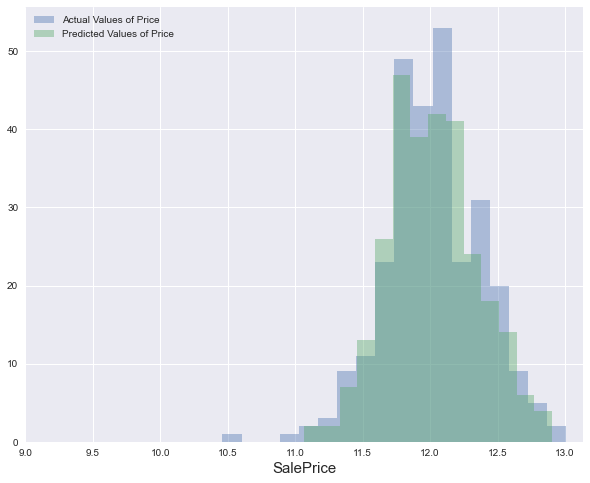

In [64]:
Predictive_Model(rf)

On peut voir que le modèle prédit mal les valeurs proche de la médiane et les valeurs hautes.

### 4.1.5 Gradient Boosting

Assomptions:
Pas trouvé d'assomptions

R_squared: 0.8596066947045152
Square Root of MSE: 0.1362972352218017


C:\Users\Adrien\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


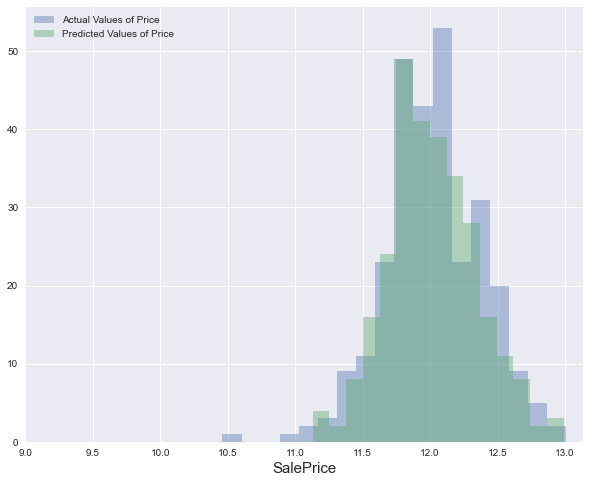

In [65]:
Predictive_Model(gbr)

Ce modèle obtient comme la régression linéaire et le Random Forest un bon score. Une fois de plus les valeurs proche de la médiane sont compliquées à prédire. 

### 4.1.6 Sommaire des performances initiales

In [66]:
regressor = ['Linear Regression', 'KNN', 'Decision Tree', 'RandomForest', 'GradientBoosting']
models = [lr, knn, dt, rf, gbr ]
R_squared = []
RMSE = []
for m in models:
    m.fit(X_train, y_train)
    prediction_m = m.predict(X_test)
    r2 = metrics.r2_score(y_test, prediction_m)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction_m))
    R_squared.append(r2)
    RMSE.append(rmse)
basic_result = pd.DataFrame({'R squared':R_squared,'RMSE':RMSE}, index=regressor)
basic_result

,R squared,RMSE
Linear Regression,0.830903,0.149583
KNN,0.814863,0.156517
Decision Tree,0.658956,0.212432
RandomForest,0.846866,0.142347
GradientBoosting,0.859607,0.136297


On peut voir que nos meilleurs modèles sont dans l'ordre: le GradientBoosting, le Random Forest puis la régression linéaire.

## 4.2 Cross Validation et Grid Search

Nous allons faire des crossvalidations qui utilisent automatiquement plusieurs holdouts afin de confirmer les performances des modèles.

Nous allons également faire des GridSearchCV pour connaitres les paramètres optimaux pour les modèles. 

In [67]:
X[features].shape

(1423, 8)

In [68]:
y.shape

(1423,)

In [69]:
scoring={'R_squared':'r2','MSE':'neg_mean_squared_error'}
kf = KFold(n_splits=12, random_state=42, shuffle=True)

# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X[features], y, scoring='neg_mean_squared_error', cv=kf))
    return (rmse)

def CrossVal(estimator):
    scores = cross_validate(estimator, X[features], y, cv=kf, scoring=scoring)
    r2 = scores['test_R_squared'].mean()
    mse = abs(scores['test_MSE'].mean())
    print('R_squared:', r2)
    print('Square Root of MSE:', np.sqrt(mse))
    
def GridSearch(estimator, Features, Target, param_grid):
    for key, value in scoring.items():
        grid = GridSearchCV(estimator, param_grid, cv=10, scoring=value)
        grid.fit(Features,Target)
        print(key)
        print('The Best Parameter:', grid.best_params_)
        if grid.best_score_ > 0:
            print('The Score:', grid.best_score_)
        else:
            print('The Score:', np.sqrt(abs(grid.best_score_)))
        print()
        

Ci-dessus, plusieurs fonctions permettant de réaliser les CrossValidations et GridSearchCV.

In [70]:
from sklearn.model_selection import validation_curve
def ValidationCurve(estimator, Features, Target, param_name, Name_of_HyperParameter, param_range):
    
    train_score, test_score = validation_curve(estimator, Features, Target, param_name, param_range,cv=10,scoring='r2')
    Rsqaured_train = train_score.mean(axis=1)
    Rsquared_test= test_score.mean(axis=1)
    
    plt.figure(figsize=(10,5))
    plt.plot(param_range, Rsqaured_train, color='r', linestyle='-', marker='o', label='Training Set')
    plt.plot(param_range, Rsquared_test, color='b', linestyle='-', marker='x', label='Testing Set')
    plt.legend(labels=['Training Set', 'Testing Set'])
    plt.xlabel(Name_of_HyperParameter)
    plt.ylabel('R_squared')

On utilise cette fonction ci-dessus pour avoir une représentation graphique du GridSearchCV.

#### Régression linéaire

In [71]:
CrossVal(LinearRegression())

R_squared: 0.8471482436120236
Square Root of MSE: 0.14763921439695854


#### K-Nearest Neighbors (KNN)

In [72]:
param_grid = dict(n_neighbors=np.arange(5,26))
GridSearch(KNeighborsRegressor(), X[features], y, param_grid)

R_squared
The Best Parameter: {'n_neighbors': 8}
The Score: 0.8291030147497528

MSE
The Best Parameter: {'n_neighbors': 8}
The Score: 0.15627359720993134



C:\Users\Adrien\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


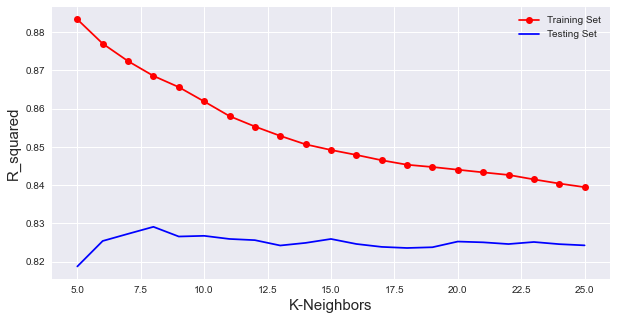

In [73]:
ValidationCurve(KNeighborsRegressor(), X[features], y, 'n_neighbors', 'K-Neighbors',np.arange(5,26))

On peut voir que le meilleur paramètre est "8 voisins" car on peut voir sur le graphe qu'à partir de 8 voisins le modèle commence à perdre en précicion. 
Le KNN est un modèle plutot stable au vu de la complexité (K-neighbors), il reste entre 0.82 et 0.83. 

#### Arbre de décision

In [74]:
param_grid=dict(max_depth=np.arange(2,15))
GridSearch(DecisionTreeRegressor(), X[features], y, param_grid)

R_squared
The Best Parameter: {'max_depth': 5}
The Score: 0.7495074529077088

MSE
The Best Parameter: {'max_depth': 5}
The Score: 0.1892527913852462



C:\Users\Adrien\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=max_depth, param_range=[ 4  5  6  7  8  9 10 11 12 13 14] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


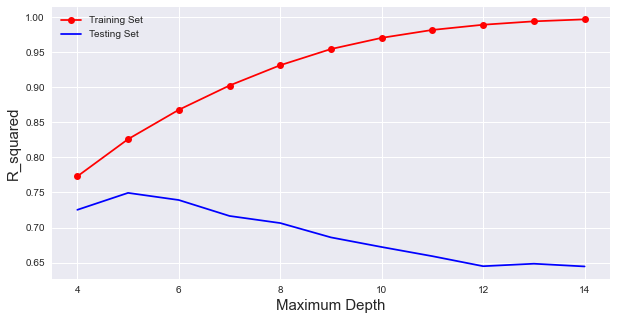

In [75]:
ValidationCurve(DecisionTreeRegressor(), X[features], y, 'max_depth', 'Maximum Depth', np.arange(4,15))

On peut voir que le meilleur paramètres est 5 feuilles car comme on le voit sur le graphe la précision baisse fortement à partir de 5. 
On constate égallement que ce modèle à tendance à overfitter assez rapidement (après 5 de profondeur), il ne faut donc pas trop le "complexifier". 

#### Random Forest

In [76]:
CrossVal(rf)

R_squared: 0.8368848177916738
Square Root of MSE: 0.15219266431144216


On pourrait faire des gridsearch pour le Random Forest et le Gradient Boosting mais ca prend beaucoup trop de temps! On a donc fait le choix de ne pas le faire. 

#### Gradient Boosting

In [77]:
CrossVal(gbr)

R_squared: 0.8554273140848468
Square Root of MSE: 0.1435185794753986


### 4.2.1 Sommaire des Cross-validation

In [78]:
lr_scores = cross_validate(LinearRegression(), X[features], y, cv=10, scoring='r2')
knn_scores = cross_validate(KNeighborsRegressor(n_neighbors=5), X[features], y, cv=10, scoring='r2')
dt_scores = cross_validate(DecisionTreeRegressor(max_depth=15, random_state=0), X[features], y, cv=10, scoring='r2')
rf_scores = cross_validate(rf, X[features], y, cv=10, scoring='r2')
gbr_scores = cross_validate(gbr, X[features], y, cv=10, scoring='r2')
lr_test_score = lr_scores.get('test_score')
knn_test_score = knn_scores.get('test_score')
dt_test_score = dt_scores.get('test_score')
rf_test_score = rf_scores.get('test_score')
gbr_test_score = gbr_scores.get('test_score')
box= pd.DataFrame({'Linear Regression':lr_test_score, 'K-Nearest Neighbors':knn_test_score, 'Decision Tree':dt_test_score, 'Random Forest':rf_test_score, 'Gradient Boosting':gbr_test_score})
box.index = box.index + 1
box.loc['Mean'] = box.mean()
box

,Linear Regression,K-Nearest Neighbors,Decision Tree,Random Forest,Gradient Boosting
1,0.840682,0.829951,0.570884,0.795761,0.831391
2,0.858824,0.820194,0.593715,0.846213,0.883226
3,0.872521,0.834083,0.739608,0.865532,0.865797
4,0.856486,0.826461,0.636541,0.865028,0.863295
5,0.852037,0.830709,0.677081,0.840080,0.858484
6,0.836174,0.785202,0.576207,0.838507,0.850309
7,0.845266,0.840655,0.738375,0.847071,0.873549
8,0.851754,0.830720,0.699833,0.858331,0.875109
9,0.812416,0.773101,0.699859,0.801789,0.835225
10,0.838960,0.816430,0.576637,0.832561,0.842753


La ligne interessante est "Mean" qui prend la moyenne des resultats trouvé avec chaque fold (on a 10 folds ici).
C'est une bonne indication de la performance des modèle. 
Ce tableau permet de confirmer que le GradientBoost est le plus performant.

Text(0.5, 0, 'K-th Fold')

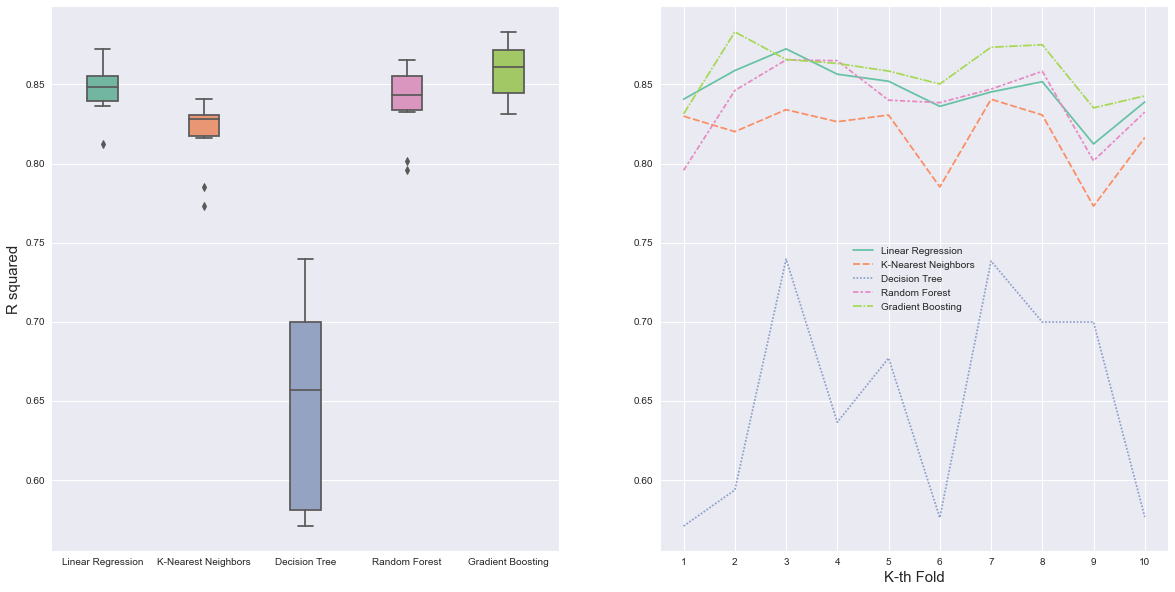

In [79]:
f,ax=plt.subplots(1,2, figsize=(20,10))
sns.boxplot(data=box.drop(box.tail(1).index), width=0.3, palette="Set2", ax=ax[0])
ax[0].set_ylabel('R squared')
sns.lineplot(data=box.drop(box.tail(1).index), palette="Set2", ax=ax[1])
ax[1].set_xticks(np.arange(1,11,1))
ax[1].set_xlabel('K-th Fold')

On peut voir que la régression linéaire a un r-squared de **0.846512** et le GradientBoosting en a un de **0.857914** ce qui est plus élevé que les autres modèles et qui nous indique que ce sont nos deux meilleurs modèles. 
De plus, on peut voir sur les graphes que le GradientBoosting à un R-square médian plus élevé et qu'il est généralement plus précis que la régression linéaire.

Le Random Forest est légerement dessous avec **0.839087**. 
Encore une fois, on voit que le decision Tree ne donne pas de bons résultats. 

## 4.3 Amélioration après cross validation

Nous appliquons les paramètres conseillés des cross validation et gridsearch
Pour le KNN nous passons les voisins de 5 à 8 et pour l'arbre de décision nous passons d'une profondeur de 15 à 5. 
Malheuresement nous n'avons pas pu amélioré nos meilleures modèles car le grid search prenait beaucoup trop de temps. 
En situation réel, il faudrait quand même prendre le temps de le faire pour trouver les meilleurs paramètres. 

In [80]:
# K_Neighbor Regressor
knn = KNeighborsRegressor(n_neighbors=8)

# Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=5, random_state=0)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

# Gradient Boost Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.001,
                                max_depth=7,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)

R_squared: 0.8340602629445297
Square Root of MSE: 0.14817981412969994


C:\Users\Adrien\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


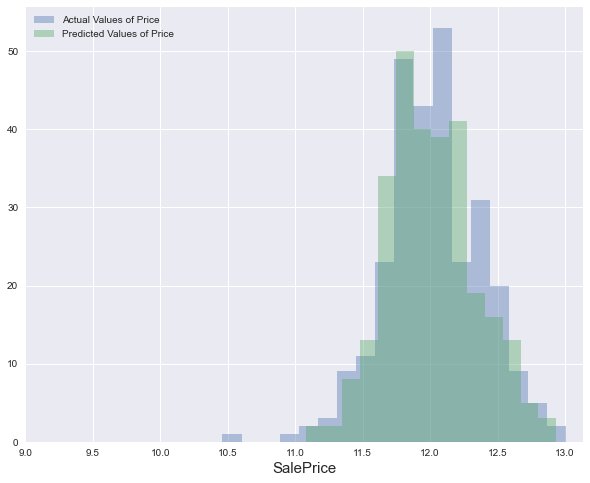

In [81]:
Predictive_Model(knn)

On peut voit que même en changeant les paramètres ce modèle ne s'améliore quasiment pas. Car ce modèle fonctionne mieu pour des classifications

R_squared: 0.7950919226114957
Square Root of MSE: 0.16466200001030212


C:\Users\Adrien\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


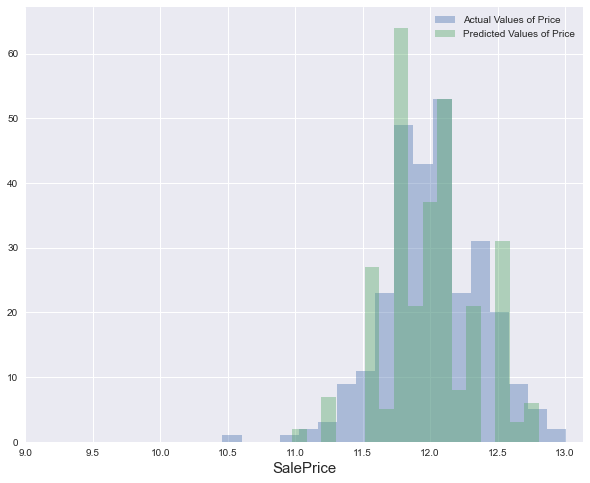

In [82]:
Predictive_Model(dt)

On peut voir que ce modèle s'améliore grandement mais qu'il reste moins bon que les autres.

In [83]:
regressor = ['KNN', 'Decision Tree', 'RandomForest', 'GradientBoosting']
models = [knn, dt, rf, gbr]
R_squared = []
RMSE = []
for m in models:
    m.fit(X_train, y_train)
    prediction_m = m.predict(X_test)
    r2 = metrics.r2_score(y_test, prediction_m)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction_m))
    R_squared.append(r2)
    RMSE.append(rmse)
basic_result = pd.DataFrame({'R squared':R_squared,'RMSE':RMSE}, index=regressor)
basic_result

,R squared,RMSE
KNN,0.834060,0.148180
Decision Tree,0.795092,0.164662
RandomForest,0.846866,0.142347
GradientBoosting,0.859607,0.136297


Pour comparer les resultats, faisons le avec la cross validation plutot. 

In [84]:
lr_scores = cross_validate(LinearRegression(), X[features], y, cv=10, scoring='r2')
knn_scores = cross_validate(KNeighborsRegressor(n_neighbors=8), X[features], y, cv=10, scoring='r2')
dt_scores = cross_validate(DecisionTreeRegressor(max_depth=5, random_state=0), X[features], y, cv=10, scoring='r2')
rf_scores = cross_validate(rf, X[features], y, cv=10, scoring='r2')
gbr_scores = cross_validate(gbr, X[features], y, cv=10, scoring='r2')
lr_test_score = lr_scores.get('test_score')
knn_test_score = knn_scores.get('test_score')
dt_test_score = dt_scores.get('test_score')
rf_test_score = rf_scores.get('test_score')
gbr_test_score = gbr_scores.get('test_score')
box= pd.DataFrame({'Linear Regression':lr_test_score, 'K-Nearest Neighbors':knn_test_score, 'Decision Tree':dt_test_score, 'Random Forest':rf_test_score, 'Gradient Boosting':gbr_test_score})
box.index = box.index + 1
box.loc['Mean'] = box.mean()
box

,Linear Regression,K-Nearest Neighbors,Decision Tree,Random Forest,Gradient Boosting
1,0.840682,0.832074,0.693605,0.795761,0.831391
2,0.858824,0.831787,0.771748,0.846213,0.883226
3,0.872521,0.838387,0.781233,0.865532,0.865797
4,0.856486,0.826464,0.800275,0.865028,0.863295
5,0.852037,0.841769,0.775241,0.840080,0.858484
6,0.836174,0.816721,0.763847,0.838507,0.850309
7,0.845266,0.835175,0.739853,0.847071,0.873549
8,0.851754,0.838712,0.771811,0.858331,0.875109
9,0.812416,0.797482,0.691481,0.801789,0.835225
10,0.838960,0.832460,0.717191,0.832561,0.842753


Le KNN s'est un peu amélioré mais reste moins bon que nos deux meilleurs modèles. 
Le decision tree s'est lui grandement amélioré, il reste cependant largement moins bons que tous nos autres modèles. 

Rappelons que ces résultats sont obtenus avec uniquement les variables de features. 

## 4.4 Amélioration avec toutes les variables

Nous avons tester les modèles avec 8 variables mais nous voulons voir les résultats que ça donne si on leurs passe toutes les variables. 


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [86]:
# K_Neighbor Regressor
knn = KNeighborsRegressor(n_neighbors=8)

# Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=5, random_state=0)

# Gradient Boost Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.001,
                                max_depth=7,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

#### Régression linéaire

Cela ne fait pas de sens de faire ca avec la régression linéaire car les assomptions ne seraient plus réspectées.

#### K Nearest Neighbors

Trop de colonnes (346), ce qui n'est pas viable pour ce modèle. 

#### Decision Tree

R_squared: 0.7278516427795996
Square Root of MSE: 0.20282049691306975


C:\Users\Adrien\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


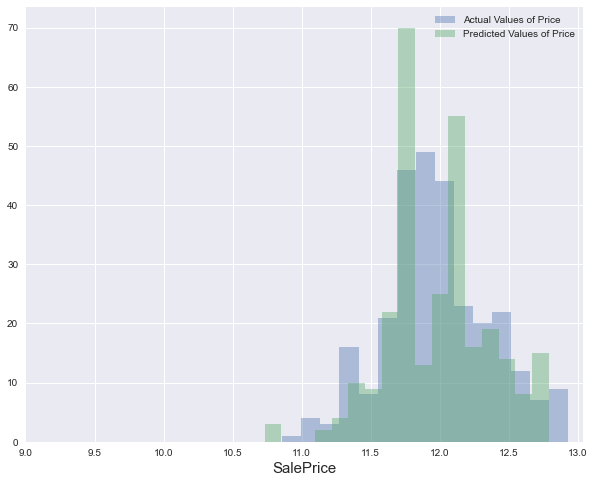

In [87]:
Predictive_Model(dt)

Le modèle s'est légérement amélioré mais il prédit assez mal les valeurs proche de la médianne.
Le R-squared n'a pas vraiment changé. 

#### Random Forest

R_squared: 0.8753871522948823
Square Root of MSE: 0.13724306052023966


C:\Users\Adrien\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


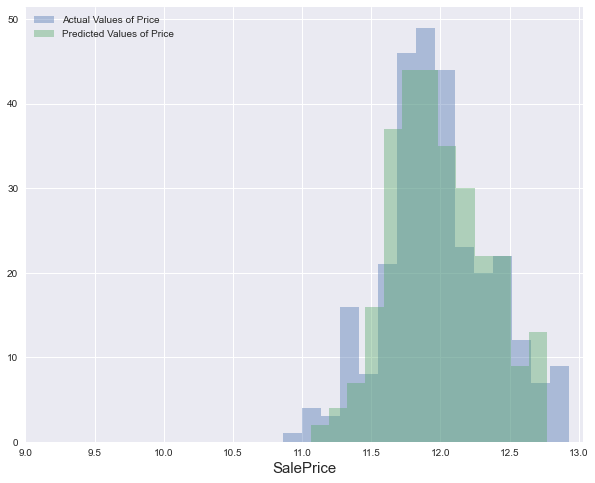

In [88]:
Predictive_Model(rf)

Le modèle s'est clairement amélioré en prenant toutes les variables. De 0.84 à 0.87 R-squared. 

#### Gradient Boosting

R_squared: 0.9031908298047477
Square Root of MSE: 0.12096708980624701


C:\Users\Adrien\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


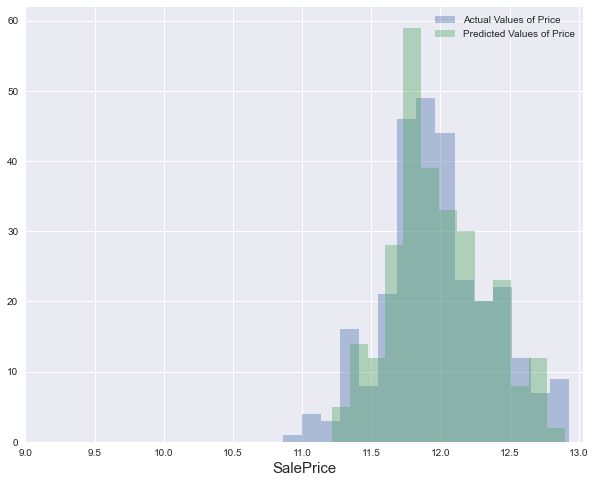

In [89]:
Predictive_Model(gbr)

Ce modèle aussi s'est néttement amélioré.

#### Résultat de nos R-Squared ainsi que de nos RMSE

In [90]:
regressor = ['Decision Tree', 'RandomForest', 'GradientBoosting']
models = [dt, rf, gbr ]
R_squared = []
RMSE = []
for m in models:
    m.fit(X_train, y_train)
    prediction_m = m.predict(X_test)
    r2 = metrics.r2_score(y_test, prediction_m)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction_m))
    R_squared.append(r2)
    RMSE.append(rmse)
basic_result = pd.DataFrame({'R squared':R_squared,'RMSE':RMSE}, index=regressor)
basic_result

,R squared,RMSE
Decision Tree,0.727852,0.202820
RandomForest,0.875387,0.137243
GradientBoosting,0.903191,0.120967


### 4.4.1 Sommaire des cross-validation de nos modèles avec toutes les variables.

On peut voir que tous les modèles se sont améliorer mais que le meilleur reste le GradientBoosting. 

In [91]:
table=X
#lr_scores = cross_validate(LinearRegression(), X[features], y, cv=10, scoring='r2')
#knn_scores = cross_validate(KNeighborsRegressor(n_neighbors=8), table, y, cv=10, scoring='r2')
dt_scores = cross_validate(DecisionTreeRegressor(max_depth=5, random_state=0), table, y, cv=10, scoring='r2')
rf_scores = cross_validate(rf, table, y, cv=10, scoring='r2')
gbr_scores = cross_validate(gbr, table, y, cv=10, scoring='r2')
#lr_test_score = lr_scores.get('test_score')
#knn_test_score = knn_scores.get('test_score')
dt_test_score = dt_scores.get('test_score')
rf_test_score = rf_scores.get('test_score')
gbr_test_score = gbr_scores.get('test_score')
box= pd.DataFrame({'Decision Tree':dt_test_score, 'Random Forest':rf_test_score, 'Gradient Boosting':gbr_test_score})
box.index = box.index + 1
box.loc['Mean'] = box.mean()
box

,Decision Tree,Random Forest,Gradient Boosting
1,0.708527,0.847686,0.900274
2,0.788221,0.886881,0.926109
3,0.788529,0.892159,0.916629
4,0.803976,0.872931,0.881505
5,0.731536,0.851139,0.876658
6,0.754953,0.877004,0.888289
7,0.772328,0.864537,0.884271
8,0.766876,0.884221,0.907183
9,0.769255,0.860029,0.921192
10,0.763763,0.856649,0.879825


En prenant toutes les variables, les modèles du Random Forest et du Gradient Boosting se sont néttement améliorés, nous gardons donc le Gradient Boosting qui a le meilleur résultat. 

# 5. Evaluation <a class="anchor" id="Evaluation"></a>

## 5.1 Les bons modèles et les moins bons

## Arbre de décision

Le modèle d'arbre de decision est le plus adapté lorsqu'il y a essentiellement des variables qualitatives, ce qui n'est pas le cas dans ce dataset. 
Le decision Tree (0.76 R-squared de moyenne) est donc loin d'être le modèle le plus performant, c'est un modèle qui est trop simple et non adapté à ce dataset.
Le fait que ce modèle ne fonctionne pas bien nous permet egallement de conclure qu'il n'y a pas beaucoup de contraintes interne, il n'y a pas d'interactions avec les variables.

## Random Forest

Le Random Forest (0.86 R-squared moyen) est aussi un modèle "d'arbre" mais il est nettement plus complexe ce qui améliore sa précision. 
Il découpe le dataset en sous ensembles, et fait un arbre avec chacun de ces sous ensembles. Il fait ensuite une moyenne des arbres obtenues ce qui a pour effet d'augmenter grandement sa précision par rapport au modèle d'arbre classique. 

## Gradient Boosting

Le dernier modèle d'arbre utilisé est le Gradient Boosting (0.90 R-squared moyen), ce modèle fait des itérations sur son résultats pour corriger les erreurs rencontrés, jusqu'à ce que les découpes corrige un maximum d'erreurs. 
On pourrait croire que ce modèle à une tendance à overfitter avec cettre pratique mais pas du tout! Il est très robuste face à l'overfitting.
C'est le modèle avec lequel nous avons eu les meilleurs resultats. 

## Régression linéaire

Le resultat obtenu avec la regression linéaire est assez bonne (0.84). Nous avons pu obtenir un bon résultat avec assez peu d'optimisation. Ce qui peut nous confirmer que les données du dataset ont une tendance à avoir des corrélations linéaires. Cela à égallement pu être démontré dans l'observation de certains scatter plots pour lesquels ont voit clairement une corrélation linéaire.

## KNN

Le modèle KNN (0.75) n'est sans doute pas le plus adapté au vu de notre situation. C'est un modèle qui est plus adapté aux problèmes de classification ou l'output est une variable discrète. Ce qui n'est pas le cas ici. 
La valeur obtenu avec ce modèle est obtenu en prenant la moyenne des valeurs de ces k nearest neighbors, ce qui n'est pas idéal. 

## 5.2 Perspectives d'améliorations
Pour améliorer les algos du Random Forest et du gradient boosting il est possible de faire des gridsearch qui permettent de trouver les meilleurs paramètres par rapport au dataset. 
Tous les paramètres ne seront pas expliqués mais il par exemple possible d’optimiser les paramètres comme 
min_samples_split le nombre minimum d’échantillon requis avant de splitter un nœud  et
min_samples_leaf qui est le nombre d’échantillon requis pour être à un nœud feuille. 

Ces algorithmes qui ont pour but d'optimiser les paramètres, sont très gourmands en ressources, nous avons donc fait le choix de ne pas les utiliser pour le projet, mais en situation réel il aurait été interessant de se pencher dessus. 

Au vu du nombre important de variables catégorique, il serait aussi préférable de faire du label encoding. 

Il existe encore plusieurs autres modèles que nous aurrions pu essayer et analyser dans ce projet comme "lasso regression", "elastic net regression", etc. Par manque de temps nous ne les avons pas utilisés mais cela ne veut pas nécessairement dire qu'ils sont moins adaptés. 

Un autre point que nous n'avons pas exploré, serait de combiner plusieurs modèles ensemble ce qui aurait pour résultats d'améliorer les prédictions (pas garantie mais serait interessant).

## 5.3 Limites
L'évaluation du prix d'une maison est lié à un tas d'attributs que nous avons pu voir tout au long du projet. 
Néanmoins une variable qui n'est pas exprimé est le ressenti humain lorsqu'on se trouve dans la maison. 
L'expert qui évalue la maison prend en considération son ressenti, son feeling, chose qui n'est pas exprimé en un variable et difficilement mesurable, mais qui impact certainement l'évaluation du prix. 
Ceci est une supposition qu'il est difficile de vérifier.

Le marché de l'immobilier ne cesse d’évoluer au fil du temps avec plus ou moins de variations. Ce modèle prend uniquement en compte le marché à un moment précis (2006 et 2010). Cette période a été marquée par une crise économique majeur (2008) qui a fait chuter les prix des maisons. C'est important de prendre ce paramètre en compte car le dataset sur lequel nos modèles ont été entrainé ont peut-être des prix plus bas que d'habitude.

Il est aussi possible que certains nouveaux attributs apparaissent et ne seront donc pas pris en compte dans ce modèle. Comme par exemple, des panneaux solaires ou encore des bornes de chargement pour les véhicules. Ces variables sont potentiellement attractives et peuvent faire augmenter le prix de la maison. 

Comme nous l’avons vu, notre modèle à tendance à surévaluer le prix des biens bon marché. C’est un point sensible pour les personnes en difficulté financières qui auront encore plus de mal à trouver un logement pas trop cher. 



# 6. Déploiement <a class="anchor" id="Deployment"></a>

## 6.1 Génération du modèle avec gradientboosting

In [92]:
print('GradientBoosting')
gbr_model_full_data = gbr.fit(X, y)

GradientBoosting


In [93]:
X_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1351,0.992753,0.187034,-0.772552,-0.507284,0.116054,0.788556,1.490874,0.128923,-0.293025,0.426424,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
435,-1.098304,-1.049770,-1.481920,1.289758,-0.015824,0.597063,-0.567016,0.117947,-0.293025,-0.968293,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
162,1.560325,0.446366,2.064919,-0.507284,-1.037881,-0.934882,3.146133,1.261674,-0.293025,-0.010421,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
657,0.425180,-0.020431,-0.772552,1.289758,0.412781,-1.030628,-0.265043,0.800671,-0.293025,-0.713467,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
705,0.365436,-0.224219,0.646183,-0.507284,-1.004912,-0.887009,0.042522,0.594317,-0.293025,0.456002,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


### 6.1.1 Prédiction de y 

In [94]:
y_preds = gbr_model_full_data.predict(X_test)

### 6.1.2 Evaluation du RMSE

In [95]:
print("Root Mean square error: " , np.sqrt(metrics.mean_squared_error(y_test,y_preds)))

Root Mean square error:  0.08616471223400732


Nous avons un RMSE de 8.6% ce qui est très bon 

### 6.1.3 Génération des valeurs prédites

In [96]:
predictions = gbr_model_full_data.predict(X_val)

output = pd.DataFrame({'Id': X_val.index, 'SalePrice': np.expm1(predictions)})
output.to_csv('Data/my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


### 6.1.4 Vérifcation des valeurs prédites par rapport aux actuelles

C:\Users\Adrien\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


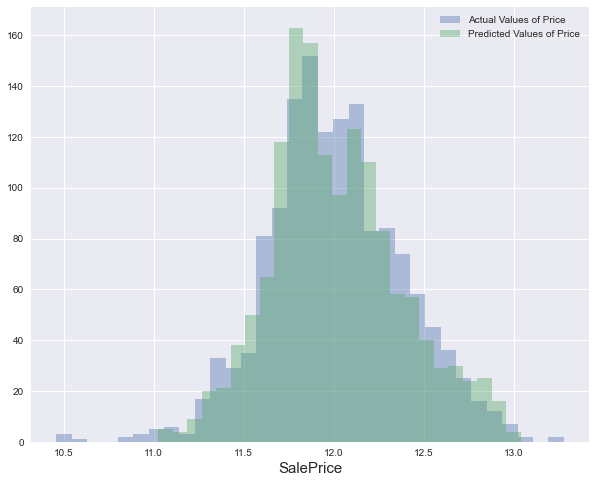

In [100]:
plt.figure(figsize=(10,8))
sns.distplot(y, hist=True, kde=False)
sns.distplot(predictions, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])

Notre modèle prédit relativement bien les valeurs proche de la médiane mais les valeurs extrèmes sont un peu plus difficile à prédire correctement. 

## 6.2 Impact <a class="anchor" id="Impact"></a>

Notre modèle permettra de s’appuyer sur des prix prédictifs. C’est avec ces derniers que l’agent immobilier pourra comparer ses estimations. Il ne faut tout de même pas se fier entièrement aux prix estimés. Une analyse traditionnelle reste indispensable et l’algorithme doit être un outil sur lequel nous pouvons nous appuyer pour fixer un prix. Laisser la main à l’algorithme sans aucun contrôle pourrait être dangereux pour le marché immobilier. Si notre modèle prédit les prix bas trop à la hausse, ce sont les personnes pauvres qui auront des difficultés à acheter une maison. 


## 6.3 Ethique <a class="anchor" id="Ethique"></a>

Comme les utilisations des algorithmes de ML sont peu réglementés, il est du devoir du data scientist de connaître l’impact potentiel que son algorithme peut avoir sur la société ou l’environnement. En effet, ces algorithmes de machine learning sont souvent utilisés à des fins financières et celles-ci ne sont pas toujours respectueuses des droits humains. Par exemple si on créer un algorithme pour une entreprise minière qui exploite des enfants et ne respecte pas l’environnement. L’entreprise minière n’est qu’un exemple, il en existe plein d’autres.

Avoir un Bachelor en informatique donne certaines responsabilités aux personnes travaillant dans le domaine car il est de leur devoir de protéger les personnes qui ne connaissent pas l’informatique. Pour éviter de passer du coté obscur de la force, un informaticien peut "signer un contrat avec lui-même" qui se nomme serment d’Archimède. Ce dernier permet à la personne qui le signe d’exprimer ses valeurs, de protections des droits humains et de l’environnement et de la reconnaisse de la responsabilité de ses actes. Ce serment peut être utilisé pour palier au manque de règles dans le monde informatique.  
 

## 6.4 Conclusion

Nous avons dans un premier temps regardé ce que contenait nos dataset. Nous avons contrôlé si les variables étaient exploitables, en gérant les null et les zéros. Ensuite, nous avons cherché à comprendre quelles étaient les variables qui influençaient le plus le prix d'une maison. Elles pouvaient autant bien influencer positivement en augmentant le prix que négativement en le diminuant. 

Un premier modèle de base a pu être établie avec les variables les plus influentes sur le prix. Ce modèle a servi de base pour notre régression linéaire et contrôler les assomptions. Les diagnostic plots ont mis en évidence les outliers que nous avons écarté par la suite. Afin d’améliorer le R-squared de notre modèle de régression, plusieurs variables ont été ajoutés à la régression.

Nous avons utilisé des gridsearch ainsi que les validation curves afin de savoir quand nos modèles overfittaient et pour trouver les paramètres optimaux. La partie Modelling était sans doute la plus complexe. Cette phase nous a permis de tester nos différents modèles et de contrôler que les assomptions pour chaque modèle étaient correctes.

Finalement, nous avons effectué des cross-validations afin de confirmer la performance de nos modèles. Il en sort de notre analyse que le GradientBoosting est le modèle le plus performant pour notre cas d’étude. 

Suite à cette analyse, nous pouvons conclure que notre modèle permet de répondre au problème métier, car ce dernier peut s'appuyer sur notre modèle pour prédire les prix, et avoir une estimation rapide du prix d'une maison. Le modèle est aussi interprétable, nous savons que les prix extrêmes sont mal estimés par exemple. 

D’un point de vu métier cela apporte différents impactes:
D’un côté, on peut imaginer que cela permet de gagner du temps sur les estimations de prix des maisons fait par l’agence, mais également des frais de personnels diminué du au gain de temps.  
Ce modèle peut également être commercialisé sur internet, afin d’attirer une clientèle cherchant à connaitre à peu près le prix de leur maison. 

